<a href="https://colab.research.google.com/github/mehrshad98/UrbanFloodPredictor/blob/main/ML_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2
In this assignment, you will explore and develop a machine learning model to predict loan approvals.
Using a dataset with socio-demographic and financial data, your goal is to analyze and understand the factors that influence loan approval and build a predictive model based on these insights.

##Project Steps Loan Approval Prediction
1. **Dataset Loading:** Begin by loading the dataset, which includes various features that may impact loan approval outcomes.

2. **Exploratory Data Analysis (EDA):** Analyze patterns and correlations within the data, considering factors like gender marital status, education level, dependents, and income. Summarize
these findings to reveal any initial insights about loan approval likelihood.

3. **Handling Missing Data:** Check for any missing values and apply techniques to handle these gaps, ensuring the dataset is ready for modeling.

4. **Data Encoding and Scaling:** Convert categorical data to numeric form through encoding, and normalize the feature values using MinMax scaling to improve model performance.

5. **Data Splitting:** Split the dataset into training and testing subsets to evaluate model accuracy.

6. **Model Training:** Train several machine learning models, including Logistic Regression, SVM (Support Vector Machine), Decision Tree, Random Forest, Naive Bayes, and K-Nearest
Neighbors (KNN).

7. **Model Evaluation:** Measure the performance of each model using appropriate metrics, such
as accuracy, precision, recall, or F1 score, to assess their effectiveness.

8. **Final Analysis and Model Selection:** Identify the best-performing model (in this case….),
summarize your findings, and save the selected model.

###Objective
By completing this assignment, you will gain practical experience in data preprocessing, model training, and performance evaluation. You will also learn how to interpret the impact of different factors on loan approval and select the most accurate machine learning model for this purpose.

##Dataset Loading
First, we need to load the dataset using pandas.

In [59]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('dataset.csv')

# Display the first few rows
print(data.head())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

##Exploratory Data Analysis (EDA)
Next, we need to explore the data to understand the patterns and relationships.

### Plot Class Distribution to Check for Imbalance
The following will create a plot to visualize the distribution of the target variable Loan_Status. This will help us see if there's a significant imbalance between the classes.

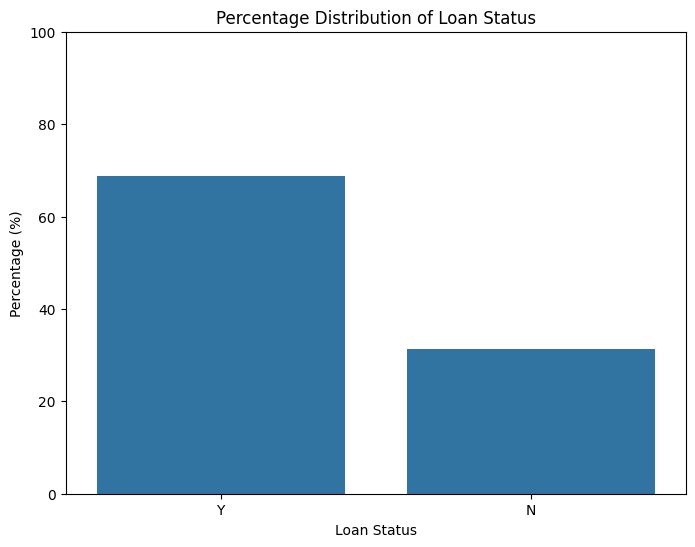

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

loan_status_counts = data['Loan_Status'].value_counts(normalize=True) * 100

# Plotting the class distribution of the target variable 'Loan_Status'
plt.figure(figsize=(8, 6))
sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values)
plt.title('Percentage Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.show()

In [61]:
# Printing the percentage for each class
for label, percentage in loan_status_counts.items():
    print(f"{label}: {percentage:.2f}%")

Y: 68.73%
N: 31.27%


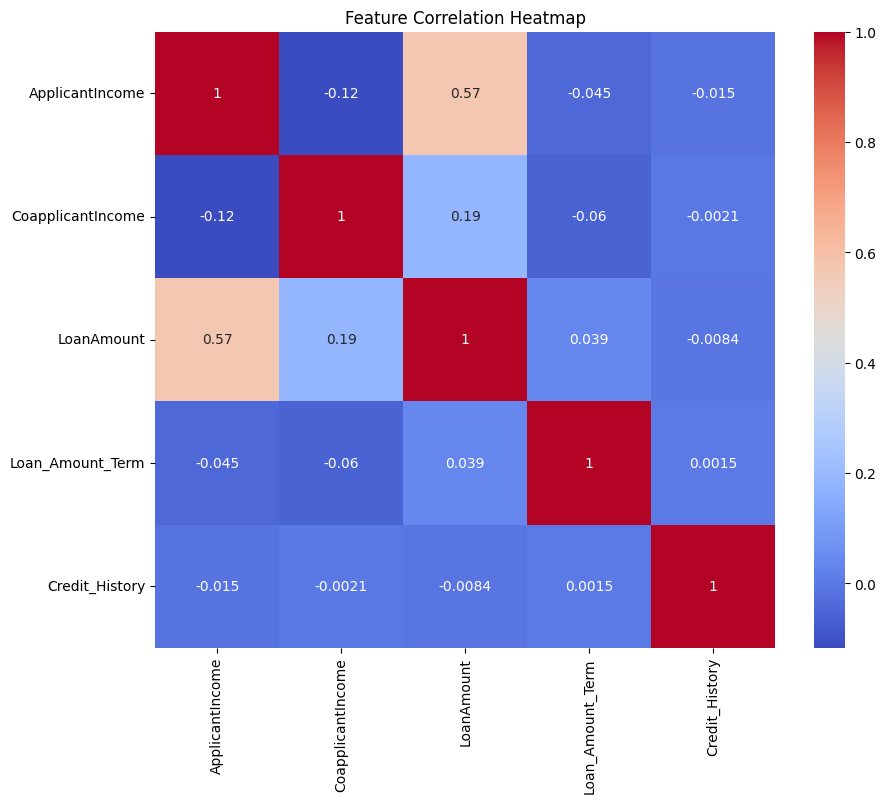

In [62]:

# Drop 'Loan_ID' since it's just an identifier and not relevant to correlation analysis
data = data.drop(['Loan_ID'], axis=1)

# Generate the correlation heatmap with only numeric features
numeric_data = data.select_dtypes(include=['int64', 'float64'])  # Select only numeric columns

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


###Handling Missing Data
Identify missing values and decide how to handle them—either by dropping or imputing.




In [63]:
print(data.isnull().sum())


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [64]:
# Handling missing values for numeric columns by filling with the median
for column in data.select_dtypes(include=['int64', 'float64']).columns:
    data[column].fillna(data[column].median(), inplace=True)

# Handling missing values for categorical columns by filling with the mode
for column in data.select_dtypes(include=['object']).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Check again to ensure there are no missing values
print(data.isnull().sum())


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<ipython-input-64-76e21553146b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
<ipython-input-64-76e21553146b>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Data Encoding and Scaling
Categorical data needs to be encoded, and numerical features should be normalized.

 ## Outliers Detection

 The distribution of each feature using box plots is a great idea for understanding the spread, outliers, and overall characteristics of the dataset.

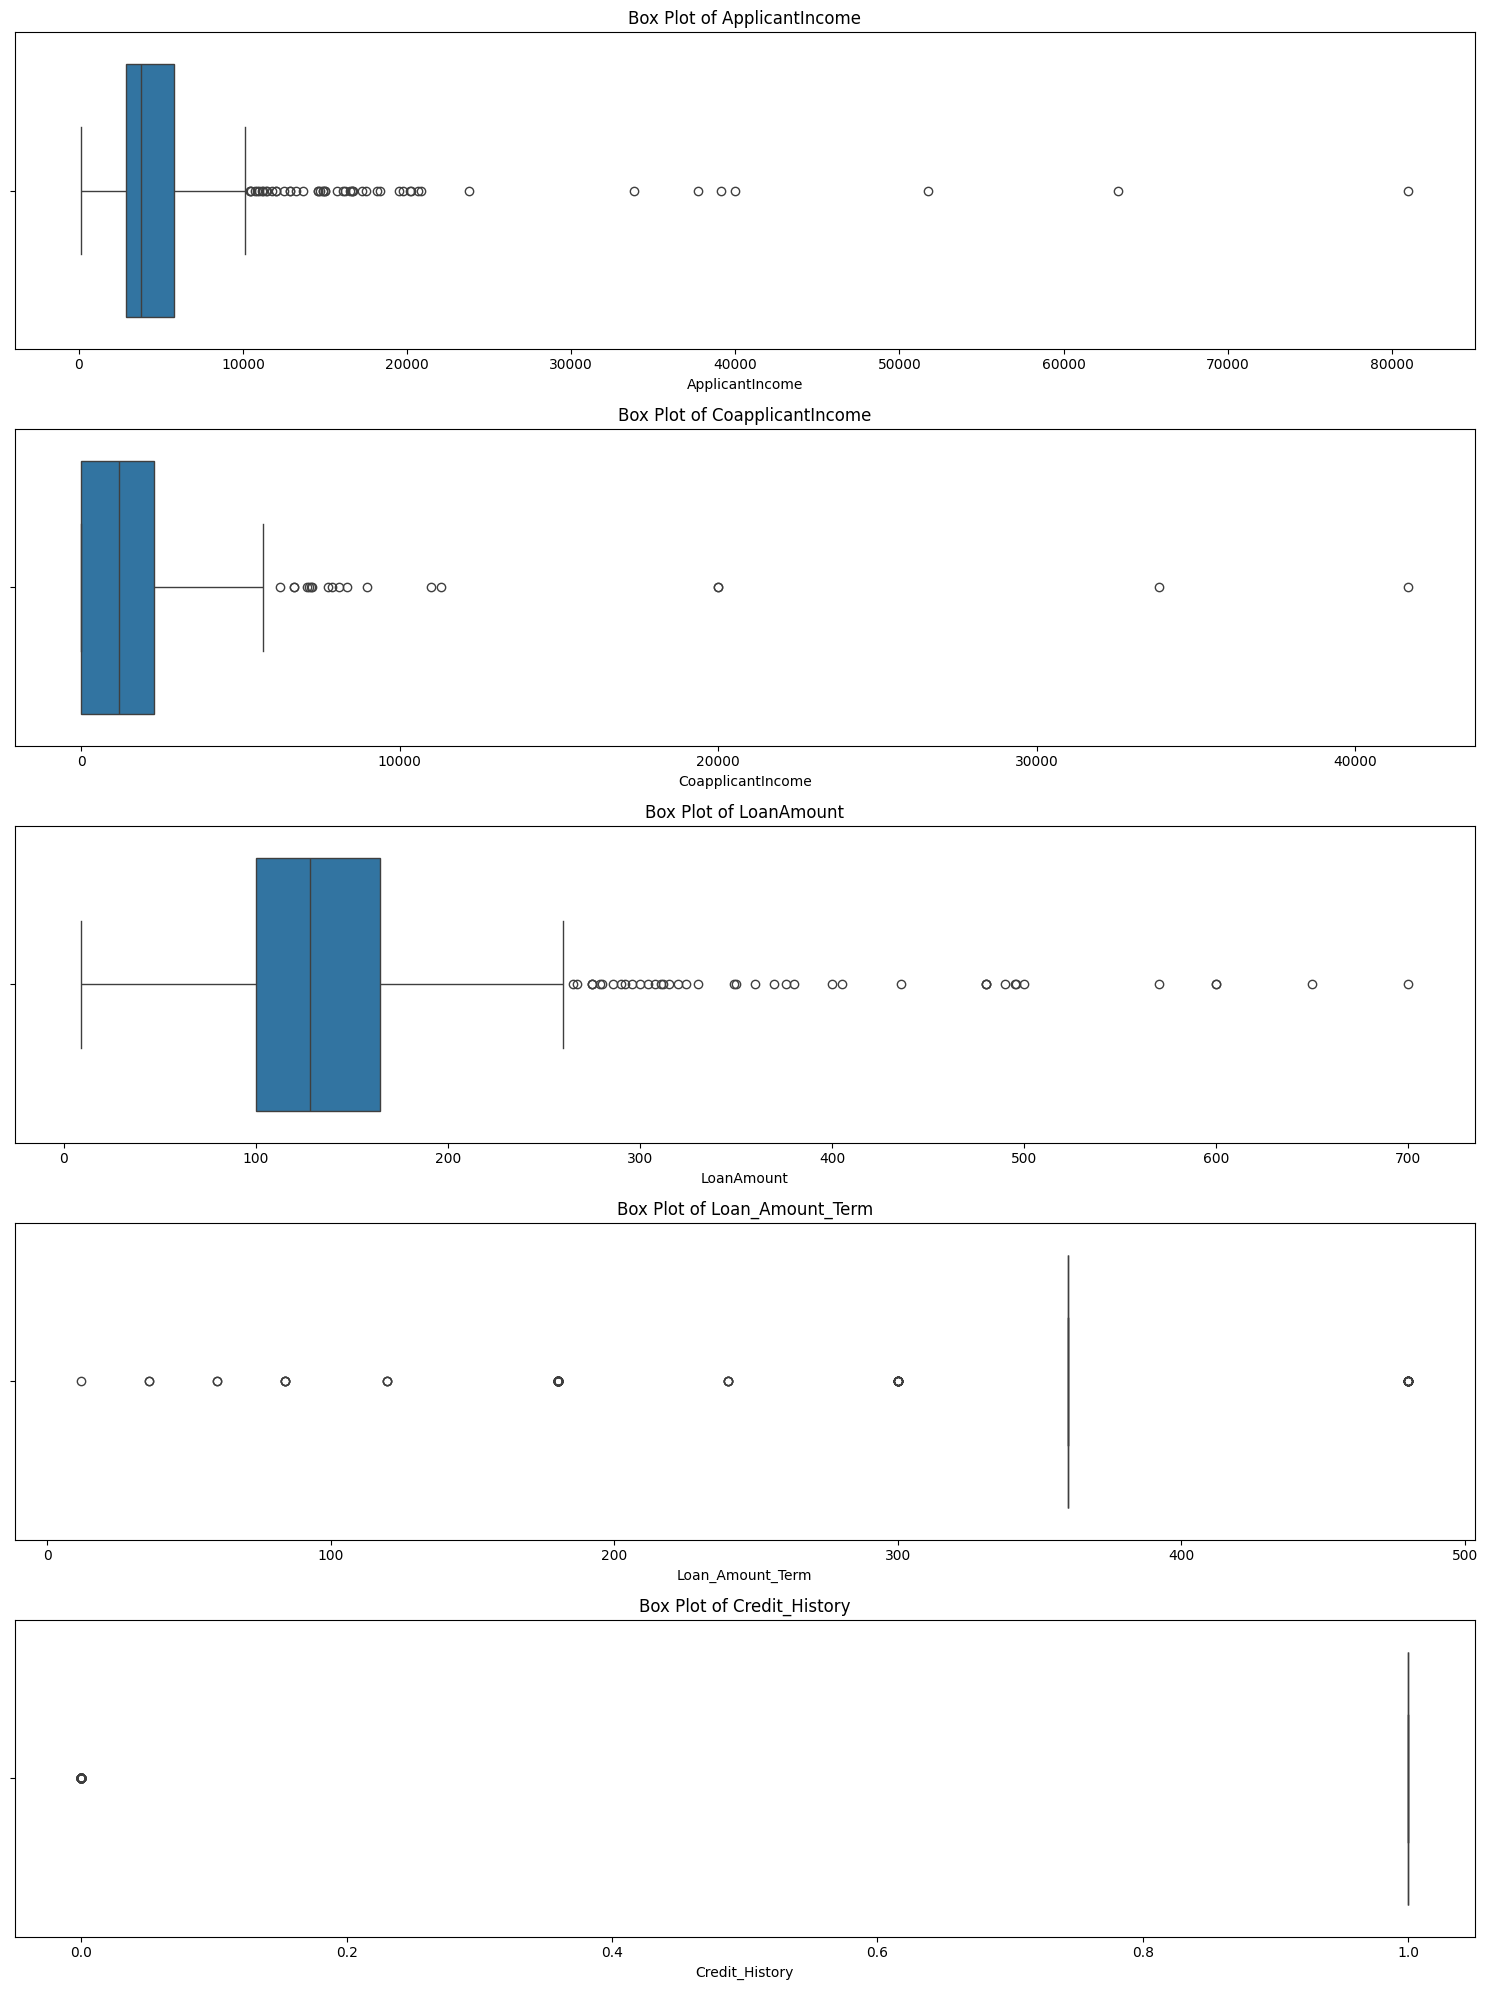

In [65]:

# Select only numeric features for box plots
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns

# Set the figure size for better readability
plt.figure(figsize=(15, len(numeric_features) * 4))

# Loop through numeric features and plot boxplots for each
for i, column in enumerate(numeric_features, 1):
    plt.subplot(len(numeric_features), 1, i)
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

In [66]:
# Identifying outliers using IQR for each numeric feature
for column in numeric_features:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Defining bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Counting outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f'Feature: {column}')
    print(f'Number of outliers: {len(outliers)}\n')



Feature: ApplicantIncome
Number of outliers: 50

Feature: CoapplicantIncome
Number of outliers: 18

Feature: LoanAmount
Number of outliers: 41

Feature: Loan_Amount_Term
Number of outliers: 88

Feature: Credit_History
Number of outliers: 89



 Let's analyze the outliers for each feature:

- ApplicantIncome:

There are many extreme values that extend far beyond the interquartile range (IQR). This feature has significant outliers, likely due to a few very high-income individuals. These outliers could affect the model, particularly models that are sensitive to scaling.

- CoapplicantIncome:

Similar to ApplicantIncome, there are outliers with significantly high values. The concentration of the data lies mostly towards the lower end, and a few extremely high values skew the distribution.

- LoanAmount:

There are a number of outliers, but they are not as extreme as those in the ApplicantIncome and CoapplicantIncome features. Still, these outliers could impact the model.

- Loan_Amount_Term:

There are a few outliers, but this feature is more categorical by nature (e.g., 360 months, 180 months). Most values seem fairly typical and represent the standard loan terms, so these "outliers" might actually be valid variations.

- Credit_History:

This feature seems binary with very little variation. The outliers seen here could just be due to the nature of the feature, and it may be best to keep it as-is.
Suggested Actions for Outliers:
ApplicantIncome &
- CoapplicantIncome:

Capping Outliers: Since these extreme values are much higher compared to the rest of the data, consider capping these at the 95th percentile to reduce their impact.
Log Transformation: Another option is to apply a log transformation, which would reduce the effect of extreme values while maintaining the relationships in the data.

- LoanAmount:

Capping at a High Percentile: You could also cap the LoanAmount at the 95th percentile to control the impact of very large loan amounts.
Loan_Amount_Term and
-  Credit_History:

These features appear to have "outliers" that might simply represent typical variation. Given their nature, it might be best to leave these features unchanged to avoid losing valuable information.

Let's proceed with capping outliers for **ApplicantIncome, CoapplicantIncome, and LoanAmount** at the 95th percentile.
We'll leave Loan_Amount_Term and Credit_History unchanged.

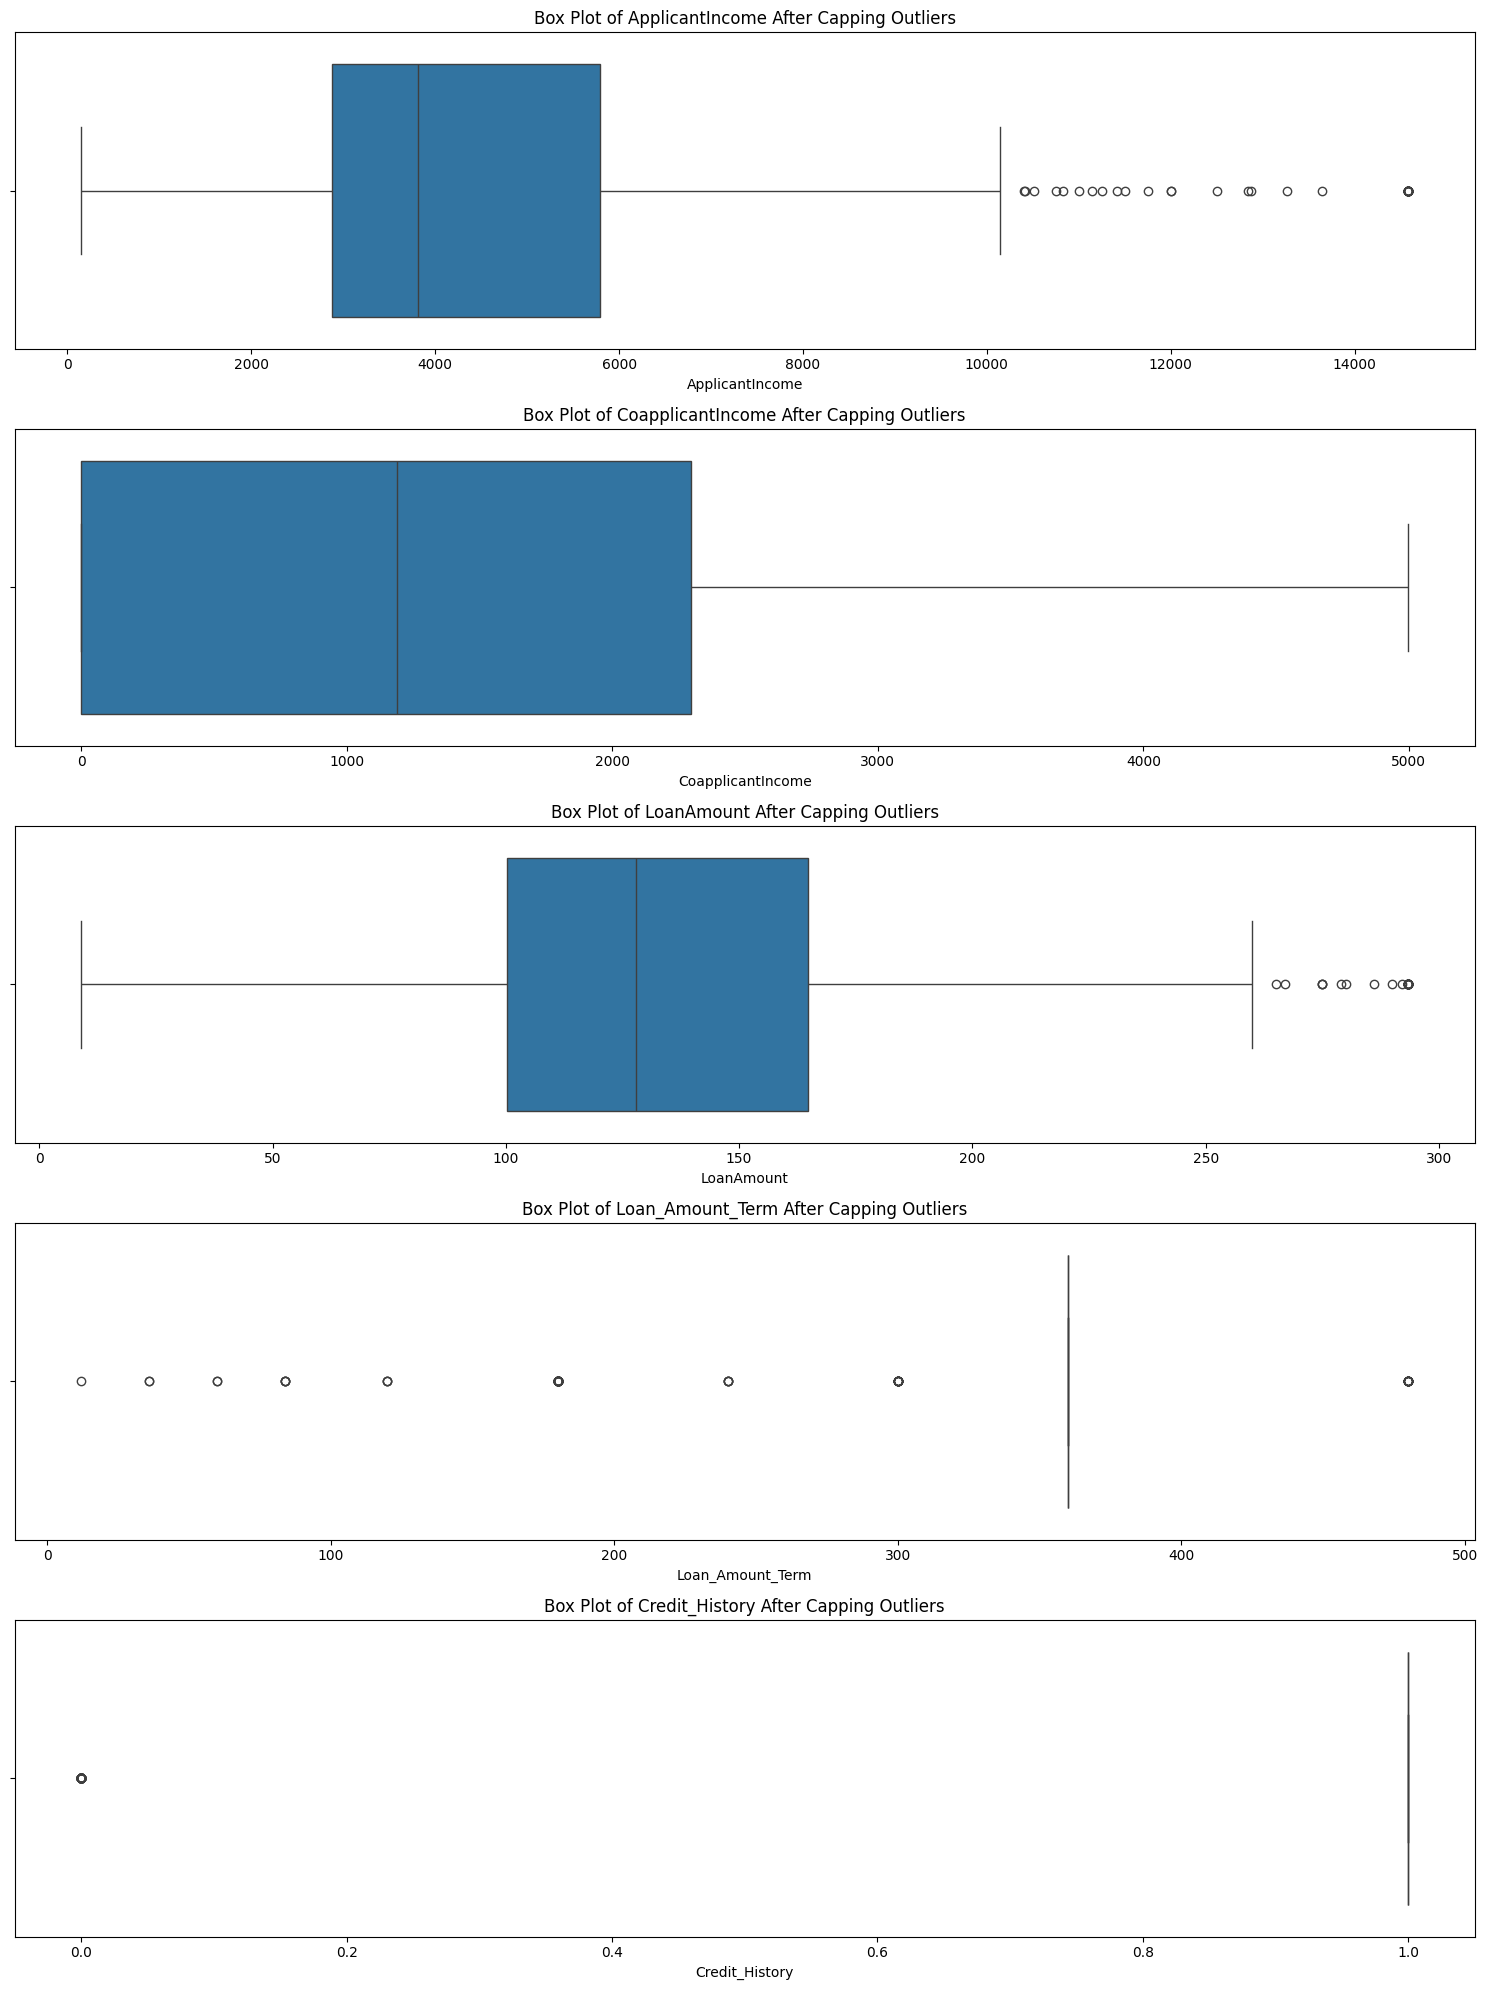

In [67]:
# Capping outliers at the 95th percentile for ApplicantIncome, CoapplicantIncome, and LoanAmount
for column in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    percentile_95 = data[column].quantile(0.95)
    data[column] = data[column].apply(lambda x: min(x, percentile_95))

# Display updated box plots to check changes
plt.figure(figsize=(15, len(numeric_features) * 4))
for i, column in enumerate(numeric_features, 1):
    plt.subplot(len(numeric_features), 1, i)
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column} After Capping Outliers')

plt.tight_layout()
plt.show()


##Data Encoding and Scaling
Categorical data needs to be encoded, and numerical features should be normalized.


In [68]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Encoding categorical variables
labelencoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = labelencoder.fit_transform(data[column])

# Scaling the data
scaler = MinMaxScaler()
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_features] = scaler.fit_transform(data[numeric_features])

print(data.head())


   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0     1.0      0.0    0.000000        0.0            0.0         0.394859   
1     1.0      1.0    0.333333        0.0            0.0         0.307143   
2     1.0      1.0    0.000000        0.0            1.0         0.197464   
3     1.0      1.0    0.000000        1.0            0.0         0.168572   
4     1.0      0.0    0.000000        0.0            0.0         0.405321   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0           0.000000    0.418425           0.74359             1.0   
1           0.301757    0.418425           0.74359             1.0   
2           0.000000    0.200422           0.74359             1.0   
3           0.471845    0.390295           0.74359             1.0   
4           0.000000    0.464135           0.74359             1.0   

   Property_Area  Loan_Status  
0            1.0          1.0  
1            0.0          0.0  
2            1.0    

## Data Splitting
Split the data into training and testing sets.


In [69]:
from sklearn.model_selection import train_test_split

# Assuming 'Loan_Status' is the target column
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##Model Training
Train multiple machine learning models.



In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train the models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} model trained.')


Logistic Regression model trained.
SVM model trained.
Decision Tree model trained.
Random Forest model trained.
Naive Bayes model trained.
K-Nearest Neighbors model trained.


##Model Evaluation
Evaluate each model based on accuracy, precision, recall, and F1 score.

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the models in a dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [72]:

# Initialize dictionaries to store the metrics
accuracy_dict = {}
precision_dict = {}
recall_dict = {}
f1_score_dict = {}

# Evaluate models and store metrics
for name, model in models.items():
    model.fit(X_train, y_train)  # Fit each model to the training data
    y_pred = model.predict(X_test)  # Predict on the test set
    accuracy_dict[name] = accuracy_score(y_test, y_pred)
    precision_dict[name] = precision_score(y_test, y_pred)
    recall_dict[name] = recall_score(y_test, y_pred)
    f1_score_dict[name] = f1_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_dict[name]:.2f}")
    print(f"Precision: {precision_dict[name]:.2f}")
    print(f"Recall: {recall_dict[name]:.2f}")
    print(f"F1 Score: {f1_score_dict[name]:.2f}")
    print('-' * 30)

Model: Logistic Regression
Accuracy: 0.79
Precision: 0.76
Recall: 0.99
F1 Score: 0.86
------------------------------
Model: SVM
Accuracy: 0.79
Precision: 0.76
Recall: 0.99
F1 Score: 0.86
------------------------------
Model: Decision Tree
Accuracy: 0.71
Precision: 0.76
Recall: 0.81
F1 Score: 0.78
------------------------------
Model: Random Forest
Accuracy: 0.78
Precision: 0.76
Recall: 0.97
F1 Score: 0.85
------------------------------
Model: Naive Bayes
Accuracy: 0.79
Precision: 0.76
Recall: 0.99
F1 Score: 0.86
------------------------------
Model: K-Nearest Neighbors
Accuracy: 0.76
Precision: 0.75
Recall: 0.96
F1 Score: 0.84
------------------------------


## Final Analysis and Model Selection

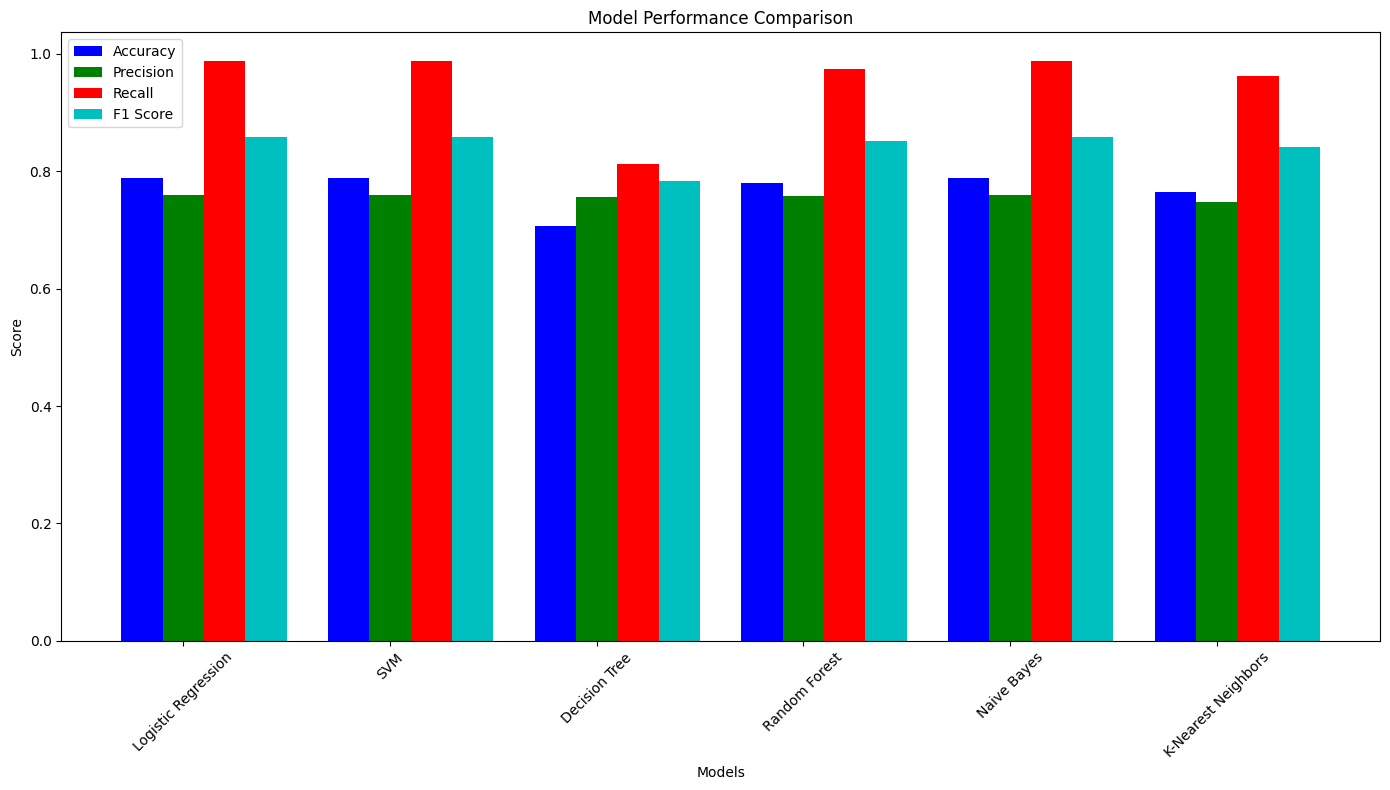

In [73]:


# Model names and their respective metrics from the dictionaries
models = list(accuracy_dict.keys())
accuracy = list(accuracy_dict.values())
precision = list(precision_dict.values())
recall = list(recall_dict.values())
f1_score = list(f1_score_dict.values())

# Set width of bar
bar_width = 0.2
index = np.arange(len(models))

# Create bar plots for each metric
plt.figure(figsize=(14, 8))

plt.bar(index, accuracy, bar_width, label='Accuracy', color='b')
plt.bar(index + bar_width, precision, bar_width, label='Precision', color='g')
plt.bar(index + 2 * bar_width, recall, bar_width, label='Recall', color='r')
plt.bar(index + 3 * bar_width, f1_score, bar_width, label='F1 Score', color='c')

# Labeling the plot
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(index + bar_width, models, rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


### Plotting the Model Complexity Curve for KNN
The following code trains KNN models with different values for n_neighbors and then plots the training and testing accuracies:



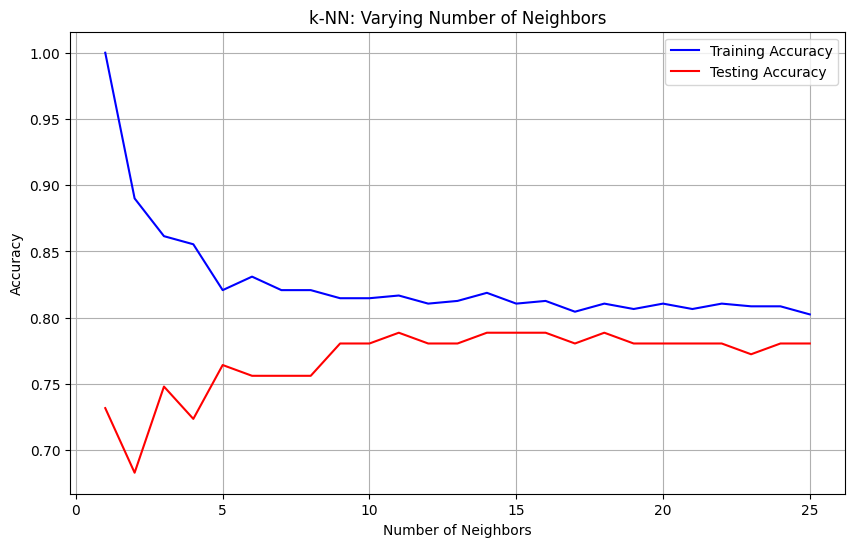

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define a range for the number of neighbors
neighbors = range(1, 26)

# Lists to store accuracy results for different number of neighbors
train_accuracies = []
test_accuracies = []

for n in neighbors:
    # Create and train KNN model
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)

    # Predict on training data
    y_train_pred = knn.predict(X_train)
    train_accuracies.append(accuracy_score(y_train, y_train_pred))

    # Predict on testing data
    y_test_pred = knn.predict(X_test)
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

# Plotting the complexity curve
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_accuracies, label='Training Accuracy', color='blue')
plt.plot(neighbors, test_accuracies, label='Testing Accuracy', color='red')
plt.title("k-NN: Varying Number of Neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [75]:
# Finding the best 'k' value based on the maximum testing accuracy
best_k = neighbors[np.argmax(test_accuracies)]

# Printing the best 'k' value
print(f'The best number of neighbors (k) for KNN is: {best_k}')

The best number of neighbors (k) for KNN is: 11


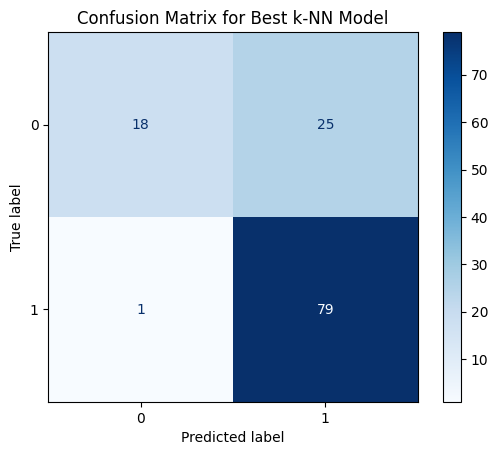

Classification Report for Best k-NN Model:
              precision    recall  f1-score   support

         0.0       0.95      0.42      0.58        43
         1.0       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [76]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Retrain the best model with the selected 'k'
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Predict on the test set
y_best_pred = best_knn.predict(X_test)

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_best_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Best k-NN Model')
plt.show()

# Print classification report
print("Classification Report for Best k-NN Model:")
print(classification_report(y_test, y_best_pred))


###Model Selection

Based on these metrics, Logistic Regression or SVM would be the best-performing models due to their high accuracy (0.79), precision, recall, and F1 scores (0.86). We will proceed with Logistic Regression as the final model, as it provides good interpretability and similar performance to SVM with potentially less computational cost.

In [ ]:
# Save the selected model - Logistic Regression
import joblib

best_model = LogisticRegression()
best_model.fit(X_train, y_train)

# Save the model using joblib
joblib.dump(best_model, 'best_loan_approval_model.pkl')
print("Best model saved as 'best_loan_approval_model.pkl'.")

Best model saved as 'best_loan_approval_model.pkl'.
